In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
from google.colab import drive
%load_ext autoreload
%autoreload 2

drive.mount('/content/gdrive', force_remount=True) #inbedpose

Mounted at /content/gdrive


# Create Extreme Data


In [ ]:
def uncover_2_cover(path_img_IR, num_dots = 8):
  """
  Creates extreme condition data using image processing techniques.
  Input : 
    path_img_IR = path to image
    num_dots  = number of dark kernels
  """

  img_IR = cv2.imread(path_img_IR)
  edge_map = cv2.Canny(img_IR,90, 150)

  l_start = 160
  r_end = 0 
  for i in range(img_IR.shape[0]):
    row =  edge_map[i,:]
    index = np.array(np.where(row == 255))
    if index.shape[1]!= 0:
      index_1 = index[0,0]
      index_2 = index[0,-1]
      if index_1 < l_start:
        l_start = index_1
      if index_2 > r_end:
        r_end = index_2
  if l_start == 160:
    l_start = 40
  if l_start - 20 < 0:
    l_start = 16
  if r_end == 0:
    r_end = 100  
  if r_end + 20 > 119:
    r_end = 104
  if l_start+20 >= r_end-20:
    l_start =40
    r_end = 100 
  start_point = random.randint(20,50)
  img_IR[start_point:,:,:] = img_IR[start_point:,:,:]//2

  # plt.figure(figsize=(10,5))
  # plt.imshow(img_IR, cmap="gray")
  # plt.title("Stage 1")

  rand_x = []
  rand_y = []
  c = 0
  while num_dots > 0:
    y = random.randint(start_point+20,130)
    x = random.randint(l_start+20,r_end-20)
    c+=1
    # print(c)
    # print(rand_x,x)
    # print(rand_y,y)
    if c ==300:
      # print(c)
      break
    if x in rand_x:
      continue
    if y in rand_x:
      continue
    rand_x.append(x)
    rand_y.append(y)
    
    num_dots-=1
    img_IR[y-10:y+10,x-10:x+10,:] = img_IR[159,119,:] #0
    # print("Filtering")
    img_IR[y-20:y+20,x-20:x+20,:] = cv2.GaussianBlur(img_IR[y-20:y+20,x-20:x+20,:],(5,5),20,20)

  
  if img_IR.min() <=20:
    diff = 20-img_IR.min()
    img_IR[start_point:,:,:] = img_IR[start_point:,:,:] + diff

  # plt.figure(figsize=(10,5))
  # plt.imshow(img_IR, cmap="gray")
  # plt.title("Stage 2")

  kernel = np.ones((3,3),np.uint8)
  img_IR = cv2.erode(img_IR,kernel,iterations = 1)

  # plt.figure(figsize=(10,5))
  # plt.imshow(img_IR, cmap="gray")
  # plt.title("Stage 3")

  img_IR = cv2.GaussianBlur(img_IR,(3,3),10,10)

  # plt.figure(figsize=(10,5))
  # plt.imshow(img_IR, cmap="gray")
  # plt.title("Stage 4")


  return img_IR

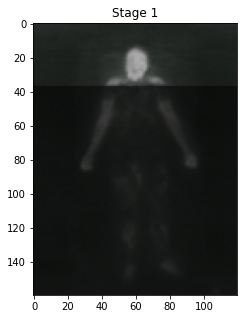

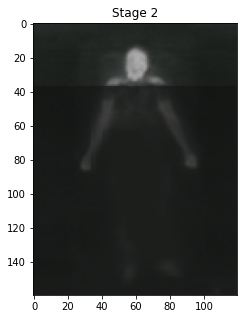

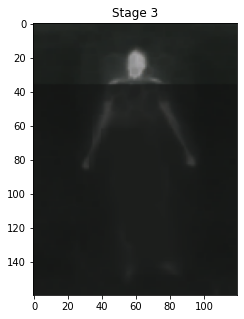

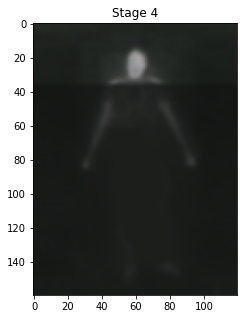

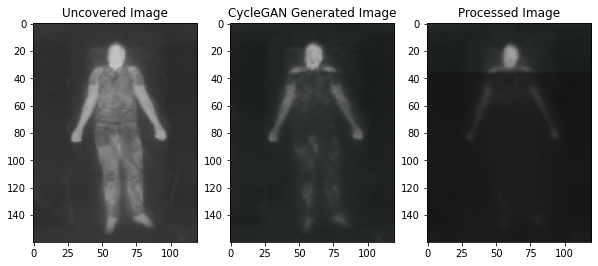

In [ ]:
#Testing
data_name = "00030"
image_name = "000007"
path = f'/content/gdrive/MyDrive/In-Bed-Human-Pose-Estimation(VIP-CUP)/train/{data_name}/IR/uncover/image_{image_name}.png' 
img_ori_IR = cv2.imread(path) 
path_img_IR = f'/content/gdrive/MyDrive/In-Bed-Human-Pose-Estimation(VIP-CUP)/train/{data_name}/IR/cyclegan_cover1/image_{image_name}.png'
img_cyclegen_cover1 = cv2.imread(path_img_IR) 

img_covered = uncover_2_cover(path_img_IR,8)


plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Uncovered Image")
plt.imshow(img_ori_IR,cmap="gray")
plt.subplot(1,3,2)
plt.title("CycleGAN Generated Image")
plt.imshow(img_cyclegen_cover1,cmap="gray")
plt.subplot(1,3,3)
plt.title("Processed Image")
plt.imshow(img_covered, cmap="gray")

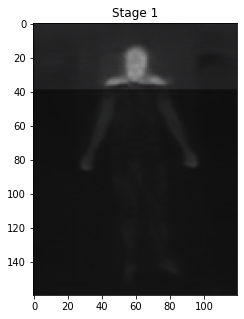

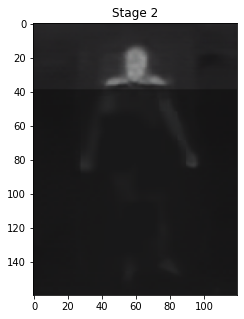

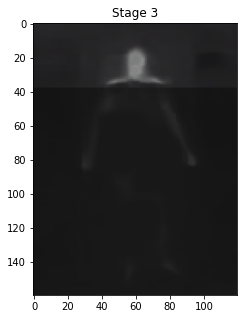

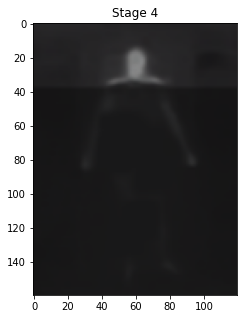

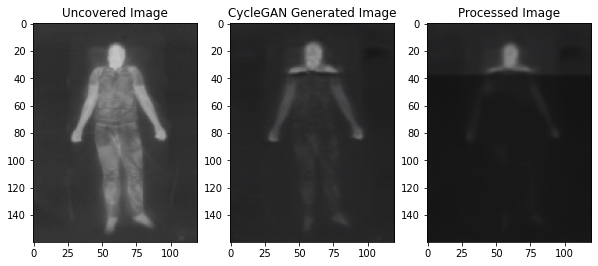

In [ ]:
#Testing
data_name = "00030"
image_name = "000007"
path = f'/content/gdrive/MyDrive/In-Bed-Human-Pose-Estimation(VIP-CUP)/train/{data_name}/IR/uncover/image_{image_name}.png' 
img_ori_IR = cv2.imread(path) 
path_img_IR = f'/content/gdrive/MyDrive/In-Bed-Human-Pose-Estimation(VIP-CUP)/train/{data_name}/IR/cyclegan_cover2/image_{image_name}.png'
img_cyclegen_cover1 = cv2.imread(path_img_IR) 

img_covered = uncover_2_cover(path_img_IR,8)


plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Uncovered Image")
plt.imshow(img_ori_IR,cmap="gray")
plt.subplot(1,3,2)
plt.title("CycleGAN Generated Image")
plt.imshow(img_cyclegen_cover1,cmap="gray")
plt.subplot(1,3,3)
plt.title("Processed Image")
plt.imshow(img_covered, cmap="gray")

In [ ]:
import glob
import os
import shutil
import random
def save_extreme(train_folder,source_folder, destination_folder):
  """
    Generates Extreme data from the train images in given folder under each subject 
    and creates a new folder under each subject as destination folder to save 
    processed images.

    train_folder        : Path to training data location
    source_folder       : Path to folder inside a subject for processing
    destination_folder  : Path to save the processed images inside subject folder
  """


  img_dir = glob.glob(train_folder+'/*')    #Path to Dataset
  train_uncover = []
  for data_dir in img_dir:   #Change for valid
      if int(data_dir[-5:])<=30:train_uncover.append(data_dir)

  train_uncover = sorted(train_uncover)
  print(train_uncover)
  print(len(train_uncover))
  for i in train_uncover:
    out_dir = destination_folder
    file_path = i+'/IR/' + out_dir 
    print("Processing : " +i)
    if os.path.exists(file_path):
      shutil. rmtree(file_path)
    os.mkdir(file_path)
    kernel = np.ones((5,5),np.uint8)
    generated_imgs = glob.glob(i+'/IR/'+source_folder+'/*.png')
    generated_imgs = sorted(generated_imgs)
    choice_list =[]
    for img in generated_imgs:
      gen_cover1_im = cv2.imread(img)
      processed_img = uncover_2_cover(img, 8)
      out_file = i+'/IR/'+out_dir+'/'+ img.split('/')[-1]
      cv2.imwrite(out_file, processed_img)


In [ ]:
train_folder =  '/content/gdrive/MyDrive/In-Bed-Human-Pose-Estimation(VIP-CUP)/train' 
source_folder = 'cyclegan_cover1'
destination_folder = 'Extreme_testing'


save_extreme(train_folder,source_folder, destination_folder)